In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
import seaborn as sns

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Во-первых название столбцов не очень \
Во-вторых в строках Age, Cabin и Embarked есть пропуски, которые нам нужно заполнить. \
В-третьех в строке Age типа данных является float64, что нам не нужно в работе, поэтому изменими на int64 \
В-четвёртых заменил в столбцах Survived , SibSP, Parch с int64 на int8 

In [6]:
df_train.columns = ('passenger_id', 'survived', 'pclass', 'name', 'sex', 'age', 'sib_sp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked')

In [7]:
df_train.describe()

,passenger_id,survived,pclass,age,sib_sp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sib_sp        891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train['age'] = df_train['age'].fillna(df_train['age'].mean()).astype('int64')
#df_train['age'] = pd.to_numeric(df_train['age'], errors='coerce')
#df_train['age'] = df_train['age'].fillna(0)
#df_train['age'] = df_train['age'].astype('int64')

In [10]:
df_train.age


0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: age, Length: 891, dtype: int64

In [11]:
df_train = df_train.drop(['cabin'], axis = 1)


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           891 non-null    int64  
 6   sib_sp        891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  embarked      889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [13]:
#df_train['sib_sp'] = df_train['sib_sp'].replace('NULL',pd.NA)
#df_train['sib_sp'] = pd.to_numeric(df_train['age'], errors='coerce')
#df_train['sib_sp'] = df_train['sib_sp'].fillna(0)
#df_train['sib_sp'] = df_train['sib_sp'].astype('int8')

#df_train['survived'] = df_train['survived'].replace('NULL',pd.NA)
#df_train['survived'] = pd.to_numeric(df_train['survived'], errors='coerce')
#df_train['survived'] = df_train['survived'].fillna(0)
#df_train['survived'] = df_train['survived'].astype('int8')

#df_train['parch'] = df_train['parch'].replace('NULL',pd.NA)
#df_train['parch'] = pd.to_numeric(df_train['parch'], errors='coerce')
#df_train['parch'] = df_train['parch'].fillna(0)
#df_train['parch'] = df_train['parch'].astype('int8')

df_train['sib_sp'].value_counts(normalize=True) 


sib_sp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64

In [14]:
df_train[df_train['embarked'].isnull()]

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN


In [15]:
len(df_train['ticket'].unique())

681

In [16]:
df_train['embarked'].value_counts() 

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
df_train['embarked'] = df_train['embarked'].fillna('S')

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           891 non-null    int64  
 6   sib_sp        891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  embarked      891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


Проверим гипотезу, что мужчины чаще умирают, чем женщины

In [19]:
women_moment = df_train.loc[df_train['sex'] == 'female' ,'survived']
rate_women_moment = sum(women_moment)/len(women_moment)
print('% women survived',rate_women_moment)

men = df_train.loc[df_train['sex'] == 'male' ,'survived']
rate_men = sum(men)/len(men)
print('% men survived' ,rate_men)


% women survived 0.7420382165605095
% men survived 0.18890814558058924


<Axes: xlabel='sex', ylabel='survived'>

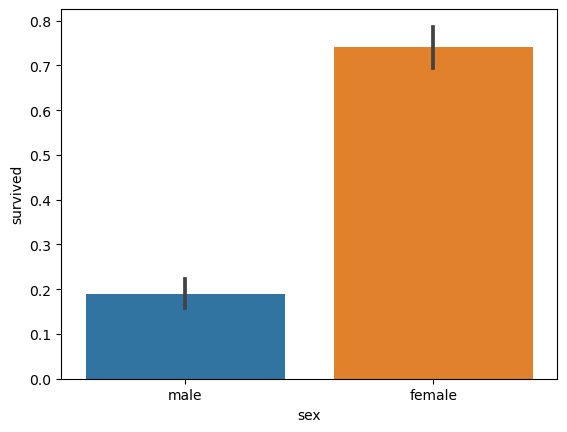

In [20]:
sns.barplot(x = 'sex', y = 'survived', data = df_train)

Заменим male и female из строковых значений на 0 и 1

In [21]:
dict = {'male': 0, 'female': 1}
df_train['sex'] = df_train['sex'].map(dict).fillna(df_train['sex']).astype('int8')

In [22]:
df_train['sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int8

In [23]:
ohe_df_ridge = df_train.select_dtypes(include='object').columns.to_list() 
print(ohe_df_ridge)

['name', 'ticket', 'embarked']


In [24]:
print(df_train.columns.to_list())

['passenger_id', 'survived', 'pclass', 'name', 'sex', 'age', 'sib_sp', 'parch', 'ticket', 'fare', 'embarked']


In [25]:
print(ohe_df_ridge)

['name', 'ticket', 'embarked']


In [27]:
encoder_ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore',sparse = False)
encoder_ohe.fit(df_train[ohe_df_ridge])
#тренировочная
df_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(df_train[ohe_df_ridge])
df_train = df_train.drop(ohe_df_ridge,axis = 1)
df_train.head(3)

KeyError: "None of [Index(['name', 'ticket', 'embarked'], dtype='object')] are in the [columns]"